In [19]:
import datetime as dt
import xlwings as xw
import pandas as pd
import numpy as np

In [2]:
df = pd.DataFrame(data=np.random.randn(100, 5),
                  columns=[f"Trial {i}" for i in range(1, 6)])
df

,Trial 1,Trial 2,Trial 3,Trial 4,Trial 5
0,0.724316,-0.441974,0.351492,0.636847,0.941576
1,-0.496567,-0.763414,0.406224,0.040514,1.966966
2,-0.869672,-0.219379,-0.662338,-1.081047,-0.184325
3,-2.042242,0.484781,-0.266837,0.038660,-1.012827
4,0.784756,2.038006,0.283484,-0.048482,0.773576
...,...,...,...,...,...
95,0.745906,-0.035185,-1.353919,1.937668,-0.317151
96,0.574565,0.764865,0.420755,-0.029843,1.628589
97,-0.493127,1.855204,-0.814085,-0.303258,-0.384555
98,1.142933,1.616612,2.107864,0.784181,1.800067


In [3]:
xw.view(df)

In [36]:
book = xw.Book()
book.name

'Libro8'

In [37]:
book.sheets

Sheets([<Sheet [Libro8]Hoja1>])

In [38]:
sheet1 = book.sheets[0]
sheet1 = book.sheets["Hoja1"]

In [13]:
sheet1.range("A1")

<Range [Libro1]Hoja1!$A$1>

In [39]:
sheet1.range("A1").value = [[1, 2],
                            [3, 4]]
sheet1.range("A4").value = "El Mojarras!"

In [18]:
sheet1.range("A1:B2").value

[[1.0, 2.0], [3.0, 4.0]]

In [19]:
sheet1.range("A4").value

'El Mojarras!'

In [20]:
book.sheets[0].range("A1:B2").value

[[1.0, 2.0], [3.0, 4.0]]

In [21]:
sheet1.range("A1:B2")[0, 0]

<Range [Libro1]Hoja1!$A$1>

In [22]:
sheet1.range("A1:B2")[:, 1]

<Range [Libro1]Hoja1!$B$1:$B$2>

In [25]:
book.sheets[0].range("A1:B2")[0, 0]

<Range [Libro1]Hoja1!$A$1>

In [26]:
sheet1["A1"]

<Range [Libro1]Hoja1!$A$1>

In [27]:
sheet1["A1:B2"]

<Range [Libro1]Hoja1!$A$1:$B$2>

In [28]:
sheet1[0, 0]

<Range [Libro1]Hoja1!$A$1>

In [29]:
sheet1[:2, :2]

<Range [Libro1]Hoja1!$A$1:$B$2>

In [30]:
"""
A veces, sin embargo, puede resultar más intuitivo definir un rango haciendo referencia 
a las celdas superior izquierda e inferior derecha de un rango. Los siguientes ejemplos se
refieren a los rangos de celdas D10 y D10: F11, respectivamente, lo que le permite comprender
la diferencia entre indexar / cortar un sheetobjeto y trabajar con un rangeobjeto:
"""

'\nA veces, sin embargo, puede resultar más intuitivo definir un rango haciendo referencia \na las celdas superior izquierda e inferior derecha de un rango. Los siguientes ejemplos se\nrefieren a los rangos de celdas D10 y D10: F11, respectivamente, lo que le permite comprender\nla diferencia entre indexar / cortar un sheetobjeto y trabajar con un rangeobjeto:\n'

In [31]:
sheet1[9, 3]

<Range [Libro1]Hoja1!$D$10>

In [32]:
sheet1.range((10, 4))

<Range [Libro1]Hoja1!$D$10>

In [33]:
sheet1[9:11, 3:6]

<Range [Libro1]Hoja1!$D$10:$F$11>

In [34]:
sheet1.range((10, 4), (11, 6))

<Range [Libro1]Hoja1!$D$10:$F$11>

In [36]:
myrange = book.sheets[0].range((10, 4), (11, 6))
myrange

<Range [Libro1]Hoja1!$D$10:$F$11>

In [37]:
sheet1["A1"].sheet.book.app

<Excel App 25300>

In [38]:
visible_app = sheet1.book.app
invisible_app = xw.App(visible=False)

In [39]:
[book.name for book in visible_app.books]

['Libro1']

In [40]:
[book.name for book in invisible_app.books]

['Libro2']

In [41]:
# An app key represents the process ID (PID)
xw.apps.keys()

[25300, 10624]

In [42]:
# It can also be accessed via the pid attribute
xw.apps.active.pid

25300

In [43]:
# Work with the book in the invisible Excel instance
invisible_book = invisible_app.books[0]
invisible_book.sheets[0]["A1"].value = "Created by an invisible app."

In [44]:
# Save the Excel workbook in the xl directory
invisible_book.save("xl/XDinvisible.xlsx")

In [45]:
# Quit the invisible Excel instance
invisible_app.quit()

In [46]:
vba_book = xw.Book("xl/vba.xlsm")

In [47]:
# Instantiate a macro object with the VBA function
mysum = vba_book.macro("Module1.MySum")
# Call a VBA function
mysum(5, 4)

9.0

In [48]:
# It works the same with a VBA Sub procedure
show_msgbox = vba_book.macro("Module1.ShowMsgBox")
show_msgbox("Hello xlwings!")

In [49]:
# Close the book again (make sure to close the MessageBox first)
vba_book.close()

In [40]:
data=[["Mark", 55, "Italy", 4.5, "Europe"],
      ["John", 33, "USA", 6.7, "America"]]
df = pd.DataFrame(data=data,
                  columns=["name", "age", "country",
                           "score", "continent"],
                  index=[1001, 1000])
df.index.name = "user_id"
df

,name,age,country,score,continent
user_id,,,,,
1001,Mark,55,Italy,4.5,Europe
1000,John,33,USA,6.7,America


In [ ]:
book = xw.Book()
book.name

In [18]:
book.sheets

com_error: (-2147417848, 'The object invoked has disconnected from its clients.', None, None)

In [17]:
sheet1 = book.sheets[0]
sheet1 = book.sheets["Hoja1"]

com_error: (-2147417848, 'The object invoked has disconnected from its clients.', None, None)

In [61]:
sheet1["A6"].value = df

In [62]:
sheet1["B10"].options(header=False, index=False).value = df

In [70]:
sheet1.range("A1").value = [[1, 2],
                            [3, 4]]

In [71]:
# Horizontal range (one-dimensional)
sheet1["A1:B1"].value

[1.0, 2.0]

In [72]:
# Vertical range (one-dimensional)
sheet1["A1:A2"].value

[1.0, 3.0]

In [73]:
# Horizontal range (two-dimensional)
sheet1["A1:B1"].options(ndim=2).value

[[1.0, 2.0]]

In [74]:
# Vertical range (two-dimensional)
sheet1["A1:A2"].options(ndim=2).value

[[1.0], [3.0]]

In [75]:
# Using the NumPy array converter behaves the same:
# vertical range leads to a one-dimensional array
sheet1["A1:A2"].options(np.array).value

array([1., 3.])

In [76]:
# Preserving the column orientation
sheet1["A1:A2"].options(np.array, ndim=2).value

array([[1.],
       [3.]])

In [77]:
# If you need to write out a list vertically,
# the "transpose" option comes in handy
sheet1["D1"].options(transpose=True).value = [100, 200]

In [35]:
# Write out some sample data
sheet1["A13"].value = [dt.datetime(2020, 1, 1), None, 1.0]

com_error: (-2146827864, 'OLE error 0x800a01a8', None, None)

In [34]:
# Read it back using the default options
sheet1["A13:C13"].value

com_error: (-2146827864, 'OLE error 0x800a01a8', None, None)

In [80]:
# Read it back using non-default options
sheet1["A13:C13"].options(empty="NA",
                          dates=dt.date,
                          numbers=int).value

[datetime.date(2020, 1, 1), 'NA', 1]

In [46]:
sheet1["A15"].value = [[None, "North", "South"],
                       ["Last Year", 2, 5],
                       ["This Year", 3, 6]]

In [47]:
chart = sheet1.charts.add(top=sheet1["A19"].top,
                          left=sheet1["A19"].left)
chart.chart_type = "column_clustered"
chart.set_source_data(sheet1["A15"].expand())

In [48]:
# Read in the chart data as DataFrame
df = sheet1["A15"].expand().options(pd.DataFrame).value
df

,North,South
Last Year,2.0,5.0
This Year,3.0,6.0


In [49]:
# Enable Matplotlib by using the notebook magic command
# and switch to the "seaborn" style
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("seaborn")

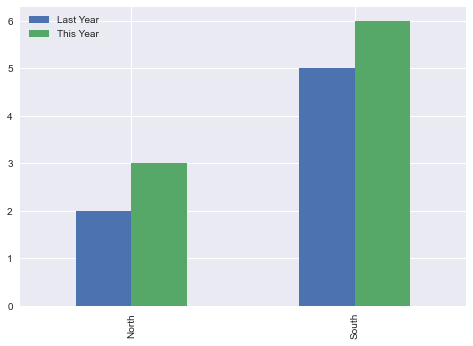

In [50]:
# The pandas plot method returns an "axis" object from 
# where you can get the figure. "T" transposes the
# DataFrame to bring the plot into the desired orientation.
ax = df.T.plot.bar()
fig = ax.get_figure()

In [141]:
# Send the plot to Excel
plot = sheet1.pictures.add(fig, name="SalesPlot",
                           top=sheet1["H19"].top,
                           left=sheet1["H19"].left)
# Let's scale the plot to 70%
plot.width, plot.height = plot.width * 0.7, plot.height * 0.7

In [130]:
ax = (df + 10).T.plot.bar()
plot = plot.update(ax.get_figure())

TypeError: can only concatenate str (not "int") to str

In [97]:
# The book scope is the default scope
sheet1["A1:B2"].name = "matrix1"

In [99]:
# For the sheet scope, prepend the sheet name with
# an exclamation point
sheet1["B10:E11"].name = "Hoja1!matrix2"

In [100]:
# Now you can access the range by name
sheet1["matrix1"]

<Range [Libro1]Hoja1!$A$1:$B$2>

In [101]:
# If you access the names collection via the "sheet1" object,
# it contains only names with that sheet's scope
sheet1.names

[<Name 'Hoja1!matrix2': =Hoja1!$B$10:$E$11>]

In [102]:
# If you access the names collection via the "book" object,
# it contains all names, including book and sheet scope
book.names

[<Name 'matrix1': =Hoja1!$A$1:$B$2>, <Name 'Hoja1!matrix2': =Hoja1!$B$10:$E$11>]

In [103]:
# Names have various methods and attributes.
# You can, for example, get the respective range object.
book.names["matrix1"].refers_to_range

<Range [Libro1]Hoja1!$A$1:$B$2>

In [104]:
# If you want to assign a name to a constant
# or a formula, use the "add" method
book.names.add("EURUSD", "=1.1151")

<Name 'EURUSD': =1.1151>

In [111]:
from pathlib import Path

import pandas as pd
__file__="C:/Users/avcm/Desktop/SensioKagle/EXCEL/python-for-excel/xl/sales_report_template.xlsx"

# Directory of this file
this_dir = Path(__file__).resolve().parent #1

# Read in all Excel files from all subfolders of sales_data
parts = []
for path in (this_dir / "sales_data").rglob("*.xls*"): #2
    print(f'Reading {path.name}')
    part = pd.read_excel(path, index_col="transaction_id")
    parts.append(part)

# Combine the DataFrames from each file into a single DataFrame
# pandas takes care of properly aligning the columns
df = pd.concat(parts)

# Pivot each store into a column and sum up all transactions per date
pivot = pd.pivot_table(df,
                       index="transaction_date", columns="store",
                       values="amount", aggfunc="sum")

# Resample to end of month and assign an index name
summary = pivot.resample("M").sum()
summary.index.name = "Month"

# Write summary report to Excel file
summary.to_excel(this_dir / "sales_report_pandas.xlsx")

Reading April.xls
Reading August.xls
Reading December.xls
Reading February.xls
Reading January.xls
Reading July.xls
Reading June.xls
Reading March.xls
Reading May.xls
Reading November.xls
Reading October.xls
Reading September.xls
Reading April.xlsx
Reading August.xlsx
Reading December.xlsx
Reading February.xlsx
Reading January.xlsx
Reading July.xlsx
Reading June.xlsx
Reading March.xlsx
Reading May.xlsx
Reading November.xlsx
Reading October.xlsx
Reading September.xlsx


In [112]:
summary

store,Boston,Chicago,Las Vegas,New York,San Francisco,Washington DC
Month,,,,,,
2019-01-31,21784.10,51187.70,23012.75,49872.85,58629.85,14057.60
2019-02-28,21454.90,52330.85,25493.10,46669.85,55218.65,15235.40
2019-03-31,20043.00,48897.25,23451.10,41572.25,52712.95,14177.05
2019-04-30,18791.05,47396.35,22710.15,41714.30,49324.65,13339.15
2019-05-31,18036.75,45117.05,21526.55,40610.40,47759.60,13147.10
2019-06-30,21556.25,49460.45,21985.05,47265.65,53462.40,14284.30
2019-07-31,19853.00,47993.80,23444.30,40408.30,50181.60,14161.50
2019-08-31,22332.90,50838.90,24927.65,45396.85,55336.35,16127.05
2019-09-30,19924.50,49096.25,24410.70,42830.60,49931.45,14994.40


In [113]:
# Open the template, paste the data, autofit the columns
# and adjust the chart source. Then save it under a different name.
template = xw.Book("C:/Users/avcm/Desktop/SensioKagle/EXCEL/python-for-excel/xl/sales_report_template.xlsx")
sheet = template.sheets["Sheet1"]
sheet["B3"].value = summary
sheet["B3"].expand().columns.autofit()
sheet.charts["Chart 1"].set_source_data(sheet["B3"].expand()[:-1, :-1])
template.save("C:/Users/avcm/Desktop/SensioKagle/EXCEL/python-for-excel/xl/XDsales_report_xlwings.xlsx")

In [114]:
# Add a new sheet and write 150 values
# to it to have something to work with
sheet2 = book.sheets.add()
sheet2["A1"].value = np.arange(150).reshape(30, 5)

In [115]:
%%time
# This makes 150 cross-application calls
for cell in sheet2["A1:E30"]:
    cell.value += 1

Wall time: 418 ms


In [116]:
%%time
# This makes just two cross-application calls
values = sheet2["A1:E30"].options(np.array).value
sheet2["A1"].value = values + 1

Wall time: 79.3 ms


In [117]:
# With raw values, you must provide the full
# target range, sheet["A35"] doesn't work anymore
sheet1["A35:B36"].options("raw").value = [[1, 2], [3, 4]]

In [52]:
import pandas as pd
import plotly.graph_objs as go
import plotly.io as pio
import plotly.express as px

# Plotly chart
df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species")

fig

In [28]:
sheet2 = book.sheets["Hoja2"]

In [53]:
file = 'filename.png'
pio.write_image(fig, file)


In [54]:
sheet1.pictures.add(fig, name='pyxl', update=True)

TypeError: Don't know what to do with that image object

In [51]:
sheet1.pictures.add(fig, name='filename', update=True)

<Picture 'filename' in <Sheet [Libro8]Hoja1>>